<a href="https://colab.research.google.com/github/sanahashmat/Image-Video-processing/blob/main/ideal_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

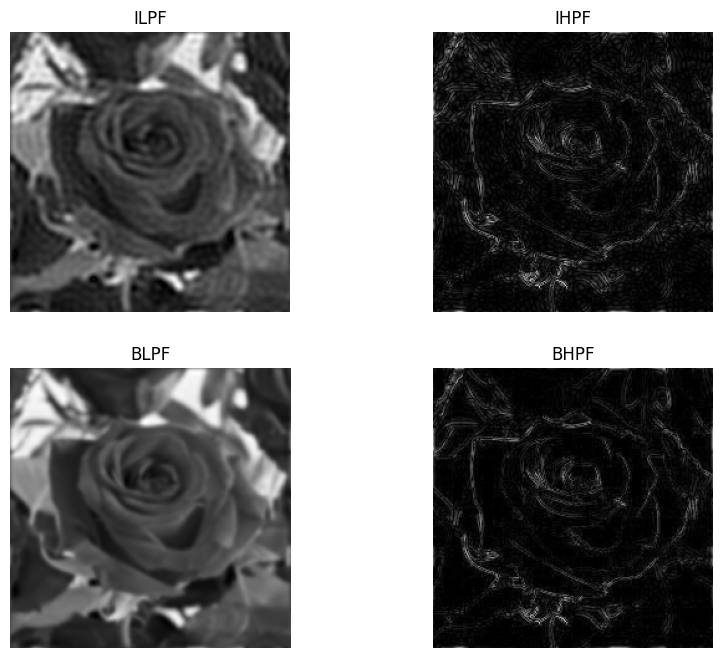

In [1]:
#Apply Ideal LPF, HPF, BLPF, BHPF in frequency domain

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/rose flower.jpg', 0)
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# DFT
dft = np.fft.fftshift(np.fft.fft2(img))

# Distance matrix
u, v = np.meshgrid(np.arange(cols), np.arange(rows))
D = np.sqrt((u-ccol)**2 + (v-crow)**2)

D0 = 30  # cutoff
n = 2    # Butterworth order

# Filters
ILPF = D <= D0
IHPF = D > D0
BLPF = 1 / (1 + (D/D0)**(2*n))
BHPF = 1 - BLPF

filters = [ILPF, IHPF, BLPF, BHPF]
titles = ["ILPF", "IHPF", "BLPF", "BHPF"]

plt.figure(figsize=(10,8))
for i in range(4):
    filtered = dft * filters[i]
    img_back = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))
    plt.subplot(2,2,i+1)
    plt.imshow(img_back, cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()
